# Exploratory Data Analysis for Titanic Dataset

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## High-Level Exploration of Dataset

Load dataset

In [2]:
df_train = pd.read_csv('data/train.csv')

Look at first 5 rows of data

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check data type for each column and number of NaNs. Column `Age` has $891 - 714 = 177$ NaNs, while `Cabin` has $891 - 204 = 687$ NaNs. For `Age` imputation could be done, while the `Cabin` column might have to be removed completely due to large number of NaNs

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Show statistics for numerical columns. Helps in spotting unusual values in the data (e.g. negative value in `Age` or `Fare`) which is useful for any necessary data cleaning later on.

In this dataset there doesn't seem to be any unusal values.

From the statistics table, the majority of values for `Fare` appear to be below 50 (75th percentile = 31), while the maximum value is ~500. This indicates skewed distribution for `Fare`.

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pairplots for quick glance of following:
- Histogram of numerical features
- Scatter plots between pairs of features, to find correlation quickly

From histogram of `Pclass`, it can be seen that majority of passenger are of passenger class 3 (the lowest class). The number of passengers of p-class 3 is about twice of that for p-class 1 or 2 individually

It can also be seen from the histograms of `SibSp` and `Parch` that many passengers tend to travel alone or with a small family (1-2 members).

While the distribution of `Age` seems approximately normal, the distribution of `Fare` is highly skewed to the left. The statistics table above indicates this too. This is something to consider if using statistical methods such as Logistic Regression.

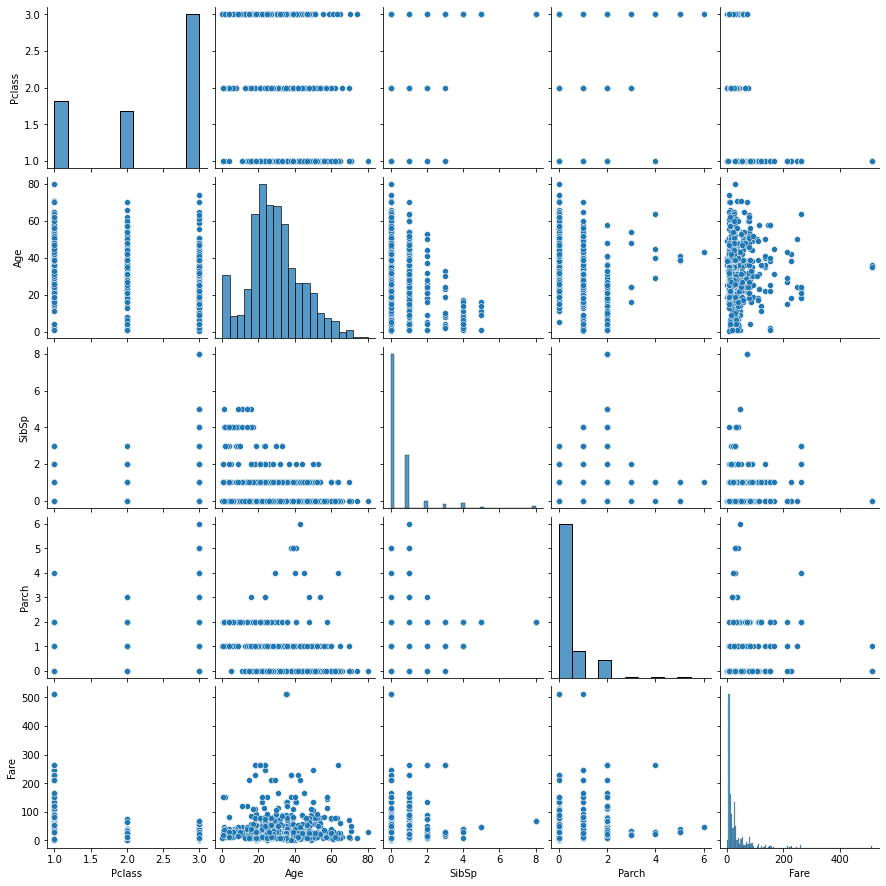

In [6]:
sns.pairplot(data=df_train.drop(columns=['PassengerId', 'Survived']))

Numerical computation of correlations between features, for quantitative measure of collinearity. The correlation table indicates that:
- `Pclass` and `Fare` have moderate correlation (-0.55)
- The correlations for other pairs of features are weak (more than -0.40 and less than 0.40)

Combined with the pairplot above, there are no pair of features with strong correlation (more than 0.60 or less than -0.60), so there may not be much worry about collinearlity issues.

Correlation strength range referenced from the article [How to Interpret a Correlation Coefficient r](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)

In [7]:
df_train.drop(columns=['PassengerId', 'Survived']).corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


## In-depth Exploration of Dataset

Cross-table showing relationship between passenger class and survival. The cross table suggest that passengers with higher p-class may be more likely to survive (p-class of 1 being the highest class and 3 the lowest) => `Pclass` may be a useful feature for predicting `Survived`.

In [8]:
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Boxplot showing the relationship between age and survival. There is no apparent relationship between age and chance of survival, based on this boxplot => `Age` might not be so useful in predicting `Survived`.

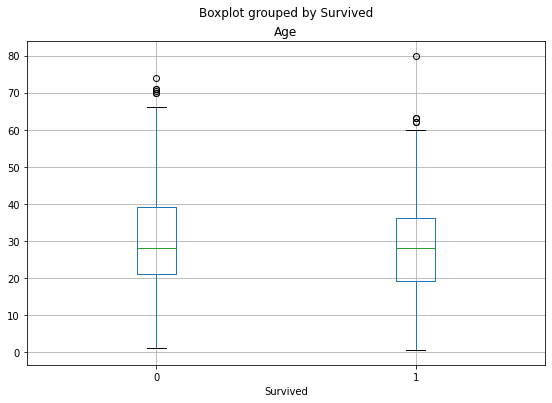

In [9]:
df_train.boxplot(column='Age', by='Survived', figsize=(9, 6));

Cross-table showing relationship between number of siblings / spouse and survival. The number of passengers seems to generally decrease with increasing number of siblings and spouse, but nothing conclusive can be drawn from this cross-table => No good way of telling if `SibSp` being useful for predicting `Survived`

In [10]:
pd.crosstab(df_train['SibSp'], df_train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Cross-table showing relationship between number of parents / children and survival. Similar analysis to that of siblings and spouses => No good way of telling if `Parch` being useful for predicting `Survived`

In [11]:
pd.crosstab(df_train['Parch'], df_train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Boxplot showing the relationship between fare and survival. The boxplot suggests that passengers who paid higher fare may have higher chance of survival => `Fare` may be useful in predicting `Survived`.

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

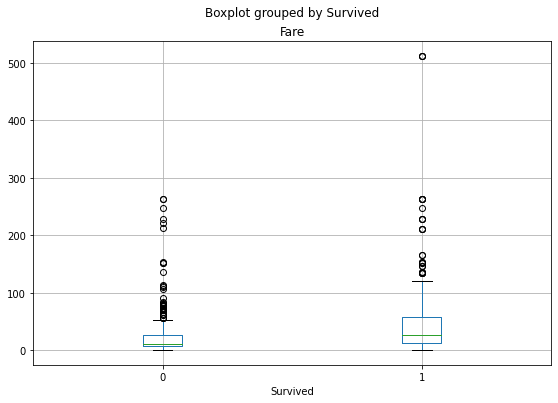

In [15]:
df_train.boxplot(column='Fare', by='Survived', figsize=(9, 6))

Cross-table showing the relationship between port of embarkation and survival. The cross-table suggests that the passengers who boarded from Cherbourg are more liekly to survive, while those who boarded from Southampton are much less likely to survive => `Embarked` may be useful in predicting `Survived`.

In [21]:
pd.crosstab(df_train['Embarked'], df_train['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


Cross-table showing the relationship between gender and survival. The cross-table suggests that females are more likely to survive than males, maybe due to the "ladies first" and gentlemanly mindset that might have been popular at that time => `Sex` may be useful in predicting `Survived`.

In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


No obvious class imbalance for labels `Survived` => using accuracy metric would not be so likely to give overly optimistic evaluation of ML models.

In [14]:
df_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64